In [ ]:
#PREVIOUS LIBRARIES
%matplotlib inline
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#NEW LIBRARY
import pandas as pd

In [ ]:
#IMPORTING DATA

data_lead = pd.read_csv( 'blood_lead.csv' )

data_lead

,Exposed,Control
0,38,16
1,23,18
2,41,18
3,18,24
4,37,19
5,36,11
6,23,10
7,62,15
8,31,16
9,34,18


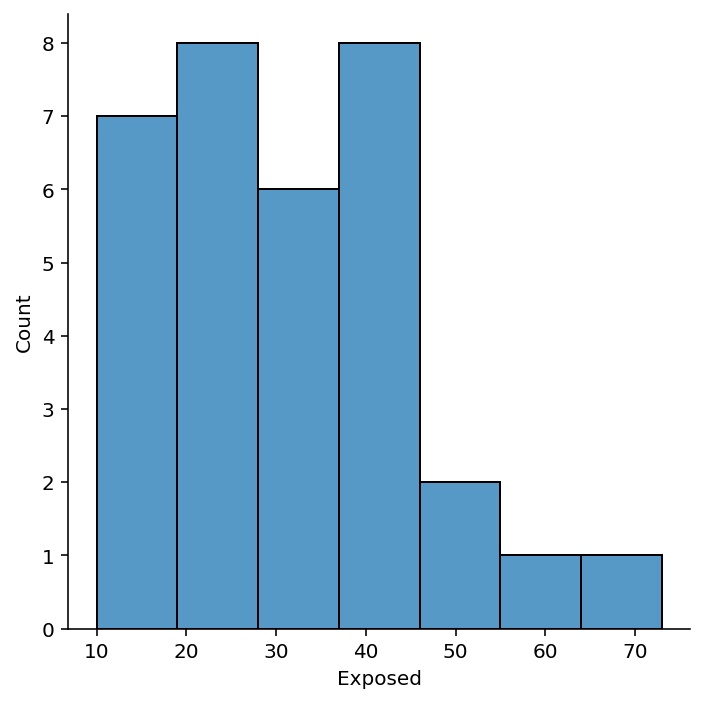

In [ ]:
#EXTRACTING EACH COLUMN
#SIMILAR TO INDEX NOTATION

exposed = data_lead['Exposed'] #extracting the 1st column in the data frame
control = data_lead['Control'] #extracting the 2nd column in the data frame

#PLOT HISTOGRAM PLOT
sns.displot( data = exposed )

# Paired analysis \(study\) \- "before and after" test

**Comparing two measurements** from the **"same"** subject.

Typically we are comparing the **before and after** effect of an event that occurred.

Examples:

1. Measuring the **blood pressure** of each person in the study, **before and after a drug is administered**.
2. Measuring the **speed** of a each swimmer in the study, **before and after a they wear a wetsuit**.

Note: Actual data: 66 children - 33 in the exposed group and 33 in the control (not exposed) group.

Assumption: **Each child exposed to lead**, is **paired** 

with a **"similar" child**, who was **not exposed**.


#### Compare the children's lead concentration.

1) Find the difference, $\Delta$, in the datasets - subtract each dataset elementwise.
2) Take the median of the difference, $\tilde{ \Delta }$ .



In [ ]:
#FIND THE DIFFERENCE
#CONVERT TO ARRAYS

exposed_arr = np.array( exposed )
control_arr = np.array( control )

print( exposed_arr )

print( '\n' ) #space line

print( control_arr )

print( '\n' )

#TAKE THE DIFFERENCE BETWEEN THE DATASETS
differences = exposed_arr - control_arr

print( differences )


#SUMMARIES RESULT BY LOOKING AT MEDIAN
#FIND THE MEDIAN DIFFERENCE

Mobs = np.median( differences )
print( Mobs )

[38 23 41 18 37 36 23 62 31 34 24 14 21 17 16 20 15 10 45 39 22 35 49 48
 44 35 43 39 34 13 73 25 27]


[16 18 18 24 19 11 10 15 16 18 18 13 19 10 16 16 24 13  9 14 21 19  7 18
 19 12 11 22 25 16 13 11 13]


[22  5 23 -6 18 25 13 47 15 16  6  1  2  7  0  4 -9 -3 36 25  1 16 42 30
 25 23 32 17  9 -3 60 14 14]
15.0


## Null Hypothesis test

$H_0$: Lead exposure makes no difference in the concentration lead in your blood, 

and the observed median difference value was because of random chance alone.

Mathematically: The median difference,  $\tilde{ \Delta } = 0$ .  

Implement: Flip the sign value of the differences. 

Some will be positive and some negative in such a way

that the median difference will be zero.

Steps:

1. **Create** a **random distribution** of **ones and negative ones**.
2. **Use** the distribution of ones to **randomly flip the signs** of some of the calculated **differences**.
3. **Find** the **median difference**  - $\tilde{ \Delta }$ .
4. **Repeat** multiple simulations.



In [ ]:
#ONE SIMULATION
signs = [1,-1] #possible flip values

#CREATE A RANDOMIZE SIGN ARRAY
flip = np.random.choice( signs , len( exposed ) )

print( flip )

print( '\n' )

print( differences )

print( '\n' )
#FLIPPED THE SIGNS IN MY DIFFERENCES
flip_diff = flip * differences

print( flip_diff )

#CALCULATE THE MEDIAN FLIP DIFFERENCES
np.median( flip_diff )

[-1 -1  1 -1 -1 -1 -1  1  1  1  1  1 -1 -1  1 -1  1 -1  1  1  1  1 -1 -1
 -1  1  1 -1  1 -1  1 -1  1]


[22  5 23 -6 18 25 13 47 15 16  6  1  2  7  0  4 -9 -3 36 25  1 16 42 30
 25 23 32 17  9 -3 60 14 14]


[-22  -5  23   6 -18 -25 -13  47  15  16   6   1  -2  -7   0  -4  -9   3
  36  25   1  16 -42 -30 -25  23  32 -17   9   3  60 -14  14]


1.0

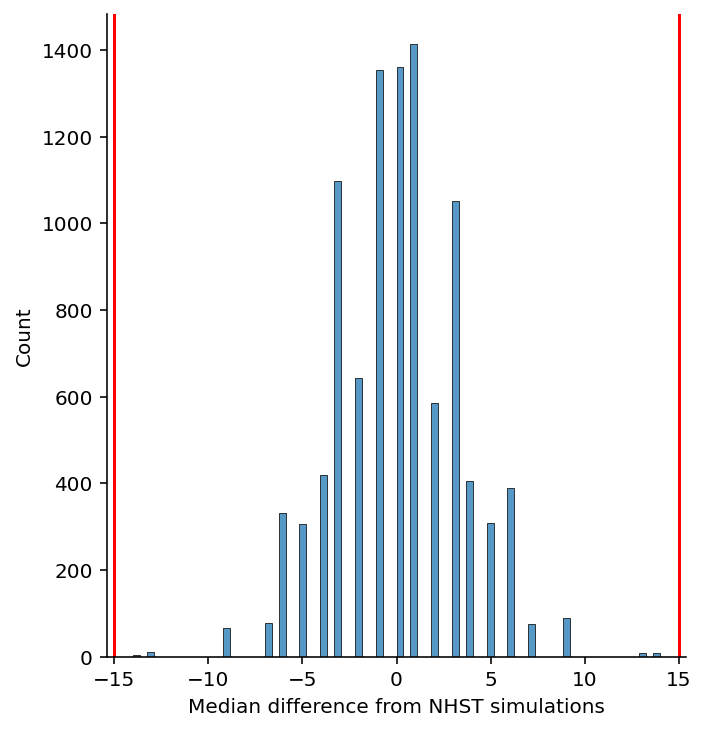

In [ ]:
#MULTIPLE SIMULATIONS

siumlations = range(10000)
signs = [1,-1] #possible flip values

md_list = []
for i in siumlations:
    #CREATE A RANDOMIZE SIGN ARRAY
    flip = np.random.choice( signs , len( exposed ) )
    
    #FLIPPED THE SIGNS IN MY DIFFERENCES
    flip_diff = flip * differences
    
    #CALCULATE THE MEDIAN FLIP DIFFERENCES
    md = np.median( flip_diff )
    
    md_list.append( md )
    
p = sns.displot( data = md_list )
p.set( xlabel = 'Median difference from NHST simulations' )
plt.axvline( Mobs , color = 'r' ) #limit
plt.axvline( -Mobs , color = 'r' ) #other limit

In [ ]:
#FIND THE 2tailed pvalue
md_arr = np.array( md_list )
extreme_left = np.sum( md_arr <= -Mobs )
extreme_right = np.sum( md_arr >= Mobs )
total_extreme = extreme_left + extreme_right
total_extreme / len( md_arr )

0.0

## Confidence Interval

Resample from the differences array.

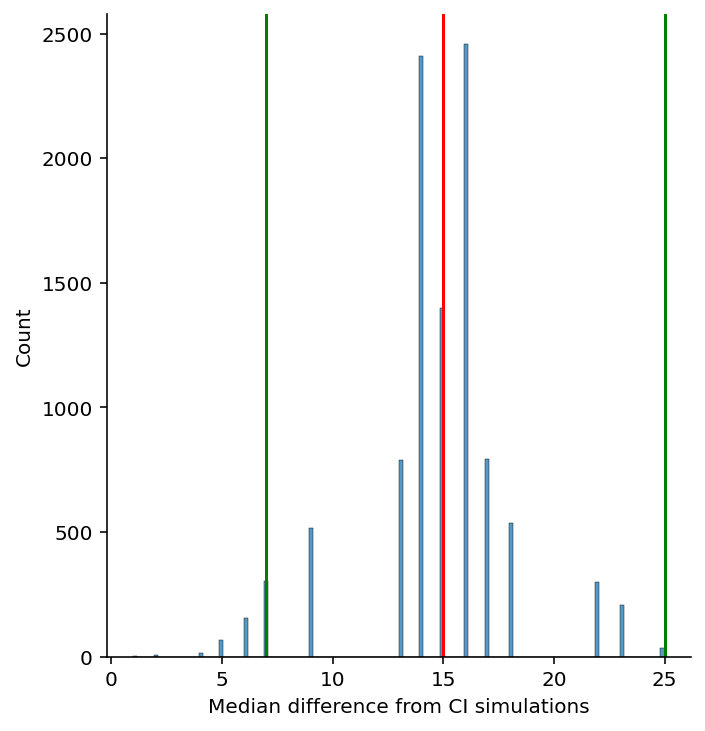

In [ ]:
#MULTIPLE SIMULATIONS

siumlations = range(10000)

#TAKE THE DIFFERENCE BETWEEN THE DATASETS
differences = exposed_arr - control_arr

md_list = []
for i in siumlations:
    #CREATE A RANDOMIZE SIGN ARRAY
    resample = np.random.choice( differences , len( differences ) )

    #CALCULATE THE MEDIAN FLIP DIFFERENCES
    md = np.median( resample )
    
    md_list.append( md )

#CI CALCULATION
md_sorted = sorted( md_list )
Mlower = md_sorted[49]
Mupper = md_sorted[9949]

lowerbound = 2*Mobs - Mupper
upperbound = 2*Mobs - Mlower
p = sns.displot( data = md_list )
p.set( xlabel = 'Median difference from CI simulations' )
plt.axvline( Mobs , color = 'r' ) #observed value
plt.axvline( lowerbound , color = 'g' ) #lowerbound
plt.axvline( upperbound , color = 'g' ) #upperbound

# Help with HW5

## Exercise 1

We did not go over how to use the np.zeros() function in discussion, so I would like to describe what this function does. This function will creates an array of zeros for you depending on the number inputted. For example, if you were to type the following,

import numpy as np

np.zeros(10)

you would get an array with 10 zeros, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]).

Instead of defining an empty list to store values in, you store values in this array of zeros. This can be more efficient when knowing the number of elements you want to store beforehand, and because and empty list is constantly updating its size.

## Exercise 3 and 4

When performing multiple tests, we need to perform a multiple-test correction - either the Benjamini-Hochberg correction or the Bonferroni correction.

We can do these correction either by hand or with Python. 

If performing the correction with Python, we need to import the statsmodels.stats.multites library. We typically give this library the name smm.

import statsmodels.stats.multitest as smm

The function we are interested in using from statsmodels.stats.multites library, is the smm.multipletests() function.

This function takes 3 inputs:

$1^{st}$: the list of pvalues you are correcting.

$2^{nd}$: the threshold you are using, $\alpha$.

$3^{rd}$: the method (as a string) you are using, Benjamini-Hochberg correction or the Bonferroni correction.

smm.multipletests( pvals, alpha, method)

The output contains 4 values:

$1^{st}$: an array specifying which pvalues are statistically significant.

$2^{nd}$: the corrected pvalues.

$3^{rd}$: the corrected alpha for Sidak method - NOT IMPORTANT

$4^{th}$: corrected alpha for Bonferroni method

In [ ]:
#1ST METHOD
#Benjamini-Hochberg correction

import statsmodels.stats.multitest as smm #import library

pvalues = [0.34, 0.001, 0.0084, 0.003, 0.013, 0.006] #list of pvalues

smm.multipletests( pvalues, alpha = 0.01, method = 'fdr_bh')

(array([False,  True, False,  True, False, False]),
 array([0.34  , 0.006 , 0.0126, 0.009 , 0.0156, 0.012 ]),
 0.0016736538523104416,
 0.0016666666666666668)

In [ ]:
#2ND METHOD
#Bonferroni correction

import statsmodels.stats.multitest as smm #import library

pvalues = [0.34, 0.001, 0.0084, 0.003, 0.013, 0.006] #list of pvalues

smm.multipletests( pvalues, alpha = 0.01, method = 'bonferroni')

(array([False,  True, False, False, False, False]),
 array([1.    , 0.006 , 0.0504, 0.018 , 0.078 , 0.036 ]),
 0.0016736538523104416,
 0.0016666666666666668)

### Note: The Bonferroni correction has a stricter penalization towards your pvalues, causing higher false negatives to occur.

## Exercise 6

In [ ]:
#IMPORT DATA
volume_change = pd.read_csv( 'contrast-baths.txt' , sep = '\t' )

volume_change #data frame

,Bath,Bath+Exercise,Exercise
0,5,6,-12
1,10,10,-10
2,-4,0,-7
3,11,14,-1
4,-3,0,-1
5,13,15,0
6,0,4,0
7,2,5,0
8,10,11,0
9,6,7,0


In [ ]:
#EXTRACT EACH COLUMN

B = volume_change['Bath']
BE = volume_change['Bath+Exercise']
E = volume_change['Exercise']

B_arr = np.array( B )
BE_arr = np.array( BE )
E_Arr = np.array( E )

B_decenter = B_arr - np.median( B_arr )

array([ -0.5,   4.5,  -9.5,   5.5,  -8.5,   7.5,  -5.5,  -3.5,   4.5,
         0.5,  -6.5,   2.5,   4.5, -14.5])

### Calculate F-statistic

$F = \frac{num}{ den}$

**Ratio** of the **across group variability** vs **within group variability**.

num = across group variability

den = within group variability

There is different ways to calculate this F-statistic. 

We will be using the following equation:

Let A, B and C represent 3 different datasets. Then the F-statistics is

$F = \frac{n_{a}|\widetilde{a}-\widetilde{G}|+n_{b}|\widetilde{b}-\widetilde{G}|+n_{c}|\widetilde{c}-\widetilde{G}|}{\Sigma|a_{i}-\widetilde{a}|+\Sigma|b_{i}-\widetilde{b}|+\Sigma|c_{i}-\widetilde{c}|} $

$\widetilde{a}$ :the median of dataset A

$\widetilde{b}$ :the median of dataset B

$\widetilde{c}$ :the median of dataset C

$\widetilde{G}$: the grand median - median of all three datasets combined.

$n_a$: number of data points in dataset A

$n_b$: number of data points in dataset B

$n_c$: number of data points in dataset C

In our case $n_a = n_b = n_c$. 

So the F-statistic can be found by

$F = \frac{n_{a} ( |\widetilde{a}-\widetilde{G}|+|\widetilde{b}-\widetilde{G}|+|\widetilde{c}-\widetilde{G}| )}{\Sigma|a_{i}-\widetilde{a}|+\Sigma|b_{i}-\widetilde{b}|+\Sigma|c_{i}-\widetilde{c}|} $



In [ ]:
#FIND THE GRAND MEDIAN

def Fcompute( data ):
    G = np.median(data) #grand median

    med_datas = data.median() #medians

    n = len( data )

    var_among = np.sum( n * np.abs(med_datas - G) ) #numerator

    var_within = np.sum( np.sum( np.abs( data - med_datas ) ) ) #denominator

    F = var_among/var_within

    return F

Fobs = Fcompute( volume_change )

Fobs

0.75

### Note: The F-stat by itself does not tell you much. F-stat needs to be compared further with multiple simulations to determine if the observed F-stat is statistically significant.

### Before performing the random simulation, we need to determine if we can assume a Big-Box method or need to decenter the datasets.

In [ ]:
def MAD( datalist ):
    z = []#empty list
    for i in datalist:
        z.append( np.abs( i - np.median(datalist) ) )
    return np.median(z)

In [ ]:
print( MAD( B ) )
print( MAD( BE ) )
print( MAD( E ) )

5.0
4.5
1.5


### Since one of the MADs is half as small as the others, we need to decenter the data.

### Each dataset needs to be decentered. This can easily be done using DataFrame arithmetic.

In [ ]:
med_vc = volume_change.median()

volume_change - med_vc

,Bath,Bath+Exercise,Exercise
0,-0.5,-3.5,-12.0
1,4.5,0.5,-10.0
2,-9.5,-9.5,-7.0
3,5.5,4.5,-1.0
4,-8.5,-9.5,-1.0
5,7.5,5.5,0.0
6,-5.5,-5.5,0.0
7,-3.5,-4.5,0.0
8,4.5,1.5,0.0
9,0.5,-2.5,0.0


In [ ]:
#STORE RESULT IN A VARIABLE
decenter_vc = volume_change - med_vc

### Now we would like to see if we can replicate the F-statistic.

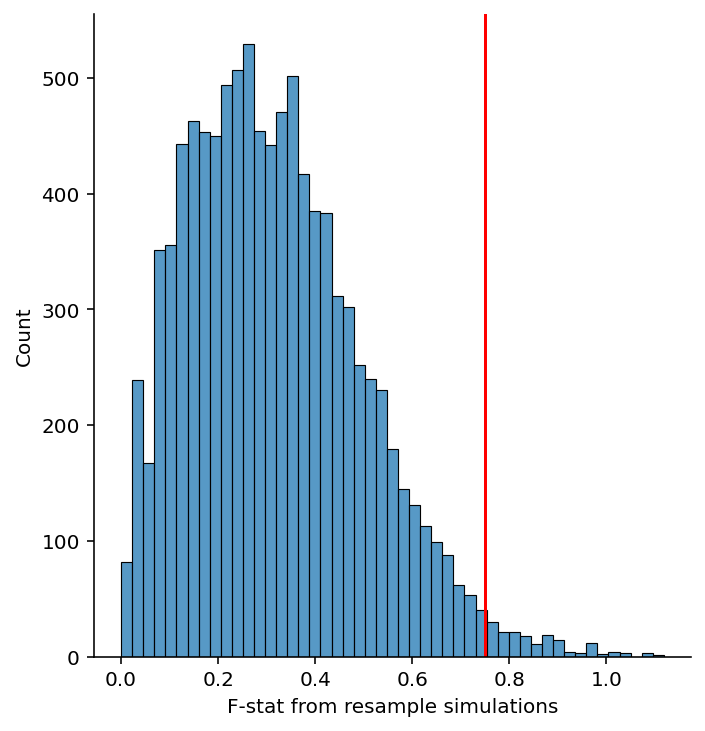

In [ ]:
simulations = range( 10000 )

#EXTRACT EACH COLUMN FROM THE DECENTERED DATA

decenter_B = decenter_vc["Bath"]
decenter_BE = decenter_vc['Bath+Exercise']
decenter_E = decenter_vc['Exercise']

F_list = []
for i in simulations:
    resample1 = np.random.choice( decenter_B,  len( decenter_B  ) )
    resample2 = np.random.choice( decenter_BE, len( decenter_BE ) )
    resample3 = np.random.choice( decenter_E,  len( decenter_E  ) )
    df_resample = pd.DataFrame( np.column_stack([resample1, resample2, resample3] ) ) # Make dataframe
    F_resample = Fcompute(df_resample) # Calculate F-statistic
    F_list.append( F_resample ) #store in sims
    
#COMPARE F DISTRIBUTION VS F OBERVED
p = sns.displot( data = F_list )
p.set( xlabel = 'F-stat from resample simulations' )
plt.axvline( Fobs , color = 'r' )

### From here you should be able to determine if the F-stat is statistically significant by finding a pvalue. If the F-statistic is significant, you can produce to 2 group comparison.

In [ ]:
F_arr = np.array( F_list )
extreme = np.sum( F_arr >= Fobs )
extreme/len( F_arr )

0.0174